# Name:
## Kala Sri Naga Sai Gopala Krishna


### Based on the metrics used above, find 3 top performing models (sufficiently different hyperparameters or belong to different techniques).
#### Saved the models as a Pickle file in the previous notebook

In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_excel('Volve.xlsx', sheet_name = 'well 1')

In [25]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI
0,4175.5,13,20.6032,4.1812,2.6117,0.0770
1,4176.0,13,21.4990,4.5516,2.6131,0.0798
2,4176.5,13,22.4472,4.4804,2.6334,0.0801
3,4177.0,13,29.6713,4.3859,2.6328,0.1005
4,4177.5,13,34.7014,4.8566,2.6183,0.1001


#### Importing all the necessary files

#### Deploy the 3 top performing models on Well 1. When deploying, ensure all feature engineering and preprocessing is performed in the right sequence/order. Well 1 needs to be used for only deployment.

In [26]:
import pickle

# Export the label encoder
with open('to_drop.pkl', 'rb') as file:
    to_drop = pickle.load(file)

# Export the Quantile Transformer
with open('quantile_transformer.pkl', 'rb') as file:
    quantile_transformer = pickle.load(file)

# Export the Standard Scaler
with open('standard_scaler.pkl', 'rb') as file:
    scl = pickle.load(file)

# Export KMeans clustering model
with open('kmeans_model.pkl', 'rb') as file:
    kmeans = pickle.load(file)

# Export Agglomerative clustering model
with open('agglomerative_model.pkl', 'rb') as file:
    agglomerative = pickle.load(file)
    
import pickle

# Load the pickle file
with open('feature_selection_scores.pkl', 'rb') as f:
    saved_data = pickle.load(f)

# Retrieve F-score, p-values, and MI score
F = saved_data['F_score']
p = saved_data['p_values']
mi = saved_data['mi_score']

# Now you can use F_loaded, p_loaded, and mi_loaded as needed


In [27]:
top_models = []
for i in range(1, 4):
    file_name = f"model{i}.pkl"
    with open(file_name, 'rb') as file:
        model = pickle.load(file)
        top_models.append(model)


In [28]:
top_models[0]

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_weighted', verbose=3)

In [29]:
df.isna().any(axis = 0)

Depth    False
Well     False
GR       False
RT       False
RHOB     False
NPHI     False
dtype: bool

In [30]:
df['RTOB'] = np.log((df['RT'] * (df['RHOB'])))

In [31]:
df['RHPI'] = df['RHOB'] - (df['NPHI']**2)


In [32]:
X = df

In [33]:
cols_to_transform = X.columns

In [34]:
X[cols_to_transform] = quantile_transformer.transform(X[cols_to_transform])

In [35]:
type(X)

pandas.core.frame.DataFrame

In [36]:
X.drop(to_drop, axis=1, inplace=True)

In [37]:
X.shape

(827, 6)

In [39]:
X.shape

(827, 6)

In [40]:
X = scl.transform(df)

In [41]:
X = X[:,(F > 15) | (mi > 0.3)]

In [42]:
kmeans_cluster_labels_test = kmeans.predict(X)

In [43]:
agglomerative_cluster_labels_test = agglomerative.fit_predict(X)

In [44]:
X_s_c = np.column_stack((X, kmeans_cluster_labels_test, agglomerative_cluster_labels_test))

In [45]:
X_s_c.shape

(827, 7)

In [46]:
top_models[0]

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_weighted', verbose=3)

In [48]:
facies1 = top_models[0].predict(X_s_c)

In [50]:
facies2 = top_models[1].predict(X_s_c)

In [51]:
facies3 = top_models[2].predict(X_s_c)

### Plot the variations in predictions of the 3 top performing models on Well 1 as a function of depth

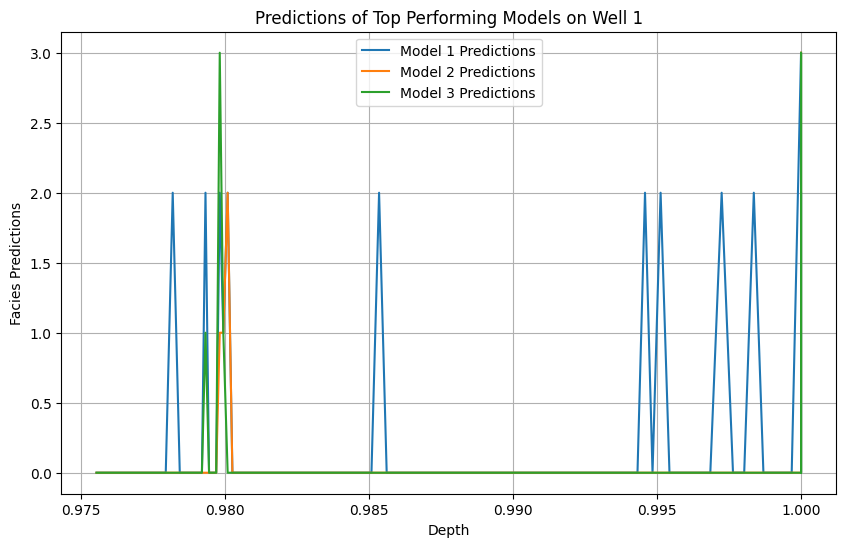

In [56]:
import matplotlib.pyplot as plt

# Extract depth values
depth_values = df['Depth']

# Plot predictions of the three models
plt.figure(figsize=(10, 6))

plt.plot(depth_values, facies1, label='Model 1 Predictions')
plt.plot(depth_values, facies2, label='Model 2 Predictions')
plt.plot(depth_values, facies3, label='Model 3 Predictions')

plt.xlabel('Depth')
plt.ylabel('Facies Predictions')
plt.title('Predictions of Top Performing Models on Well 1')
plt.legend()
plt.grid(True)

plt.show()


### Export the predictions of the 3 top-performing models for Well 1 along with depth and GR log to a separate XLS file (Prediction.xlsx).

In [58]:
import pandas as pd

# Map numerical predictions back to original labels
facies_mapping = {0: 'CB', 1: 'SH', 2: 'SS', 3: 'UN'}

# Map numerical predictions to original labels
facies1_labels = [facies_mapping[pred] for pred in facies1]
facies2_labels = [facies_mapping[pred] for pred in facies2]
facies3_labels = [facies_mapping[pred] for pred in facies3]

# Create a DataFrame to store the predictions along with depth and GR log
predictions_df = pd.DataFrame({
    'Depth': depth_values,
    'GR': df['GR'],
    'Model 1 Predictions': facies1_labels,
    'Model 2 Predictions': facies2_labels,
    'Model 3 Predictions': facies3_labels
})

# Save the DataFrame to an Excel file
predictions_df.to_excel('Prediction.xlsx', index=False)


### END